<a href="https://colab.research.google.com/github/Senuth-Per/Fuzzy-Logic-Based-Anomaly-Detection/blob/main/Fuzzyc_Logic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 30.7 MB/s eta 0:00:00


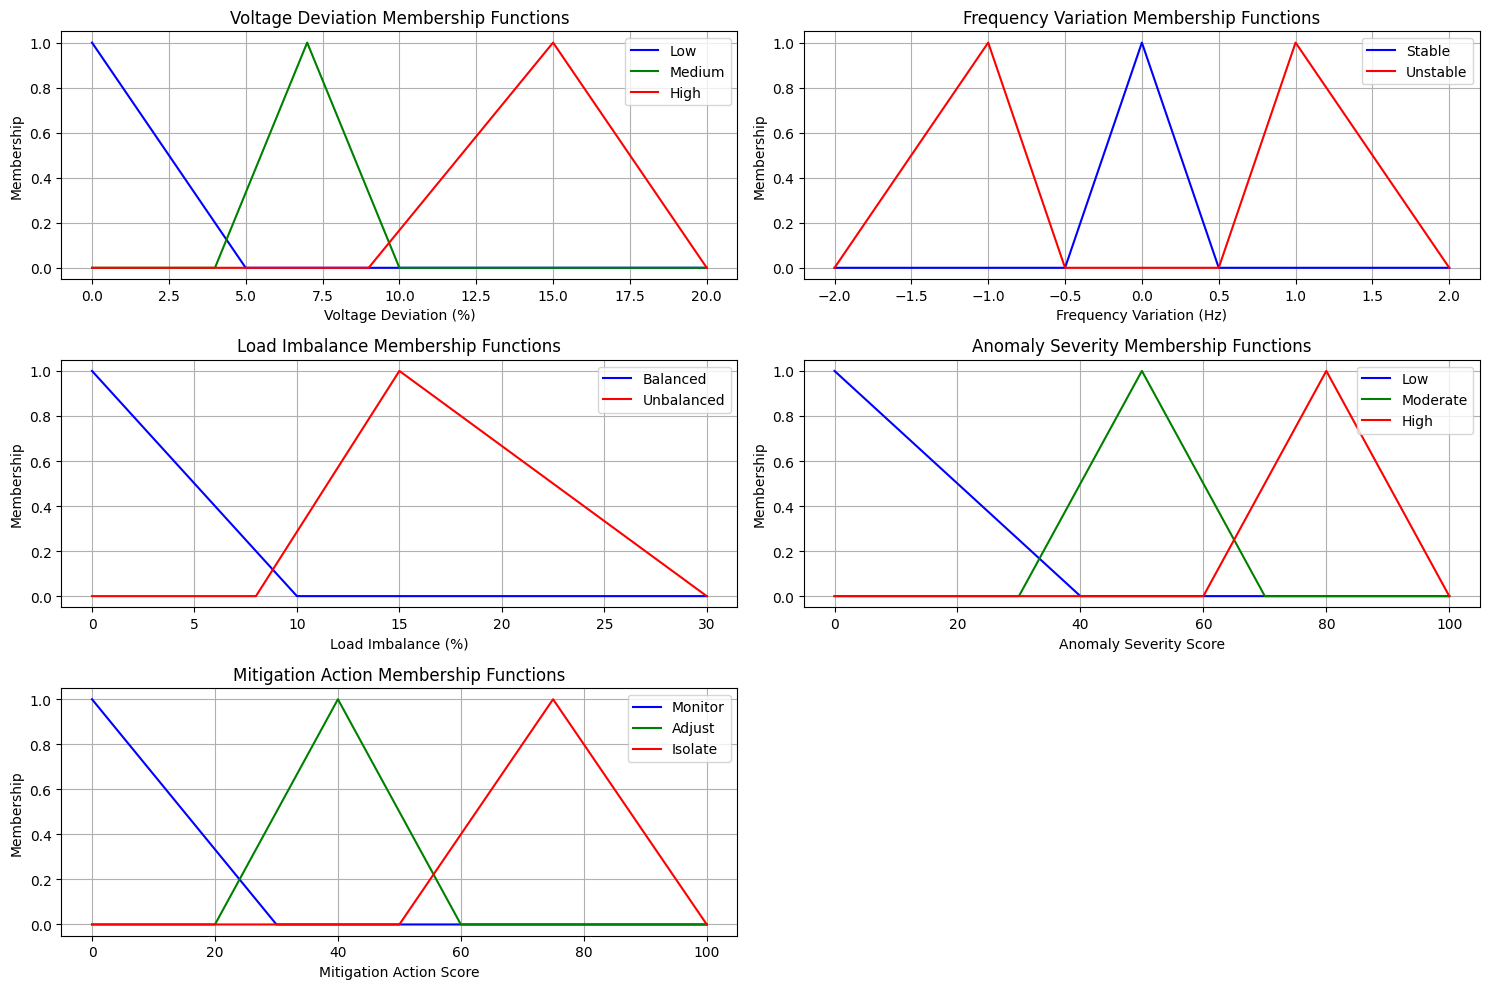

In [ ]:
# Chunk 1: Setup and Membership Functions
# This section imports libraries, defines ranges, sets up membership functions, and visualizes them.

# Import NumPy for numerical operations and array handling
import numpy as np
# Import skfuzzy for fuzzy logic operations (e.g., membership functions, defuzzification)
!pip install scikit-fuzzy
import skfuzzy as fuzz
# Import matplotlib for plotting visualizations
import matplotlib.pyplot as plt

# Define the range for Voltage Deviation (0 to 20%) with step size 1
voltage_range = np.arange(0, 21, 1)  # Voltage Deviation (%)
# Define the range for Frequency Variation (-2 to 2 Hz) with step size 0.1
freq_range = np.arange(-2, 2.1, 0.1)  # Frequency Variation (Hz)
# Define the range for Load Imbalance (0 to 30%) with step size 1
load_range = np.arange(0, 31, 1)  # Load Imbalance (%)
# Define the range for Anomaly Severity (0 to 100) with step size 1
severity_range = np.arange(0, 101, 1)  # Anomaly Severity
# Define the range for Mitigation Action (0 to 100) with step size 1
action_range = np.arange(0, 101, 1)  # Mitigation Action

# Define triangular membership functions for Voltage Deviation
# Low: Peaks at 0, drops to 0 by 5%
voltage_low = fuzz.trimf(voltage_range, [0, 0, 5])
# Medium: Rises from 4, peaks at 7, drops to 0 by 10%
voltage_medium = fuzz.trimf(voltage_range, [4, 7, 10])
# High: Rises from 9, peaks at 15, stays at 1 until 20%
voltage_high = fuzz.trimf(voltage_range, [9, 15, 20])

# Define triangular membership functions for Frequency Variation
# Stable: Peaks at 0, drops to 0 by -0.5 and 0.5 Hz
freq_stable = fuzz.trimf(freq_range, [-0.5, 0, 0.5])
# Unstable: Two triangles, one from -2 to -1 Hz, another from 0.5 to 2 Hz
freq_unstable = fuzz.trimf(freq_range, [-2, -1, -0.5]) + fuzz.trimf(freq_range, [0.5, 1, 2])

# Define triangular membership functions for Load Imbalance
# Balanced: Peaks at 0, drops to 0 by 10%
load_balanced = fuzz.trimf(load_range, [0, 0, 10])
# Unbalanced: Rises from 8, peaks at 15, stays at 1 until 30%
load_unbalanced = fuzz.trimf(load_range, [8, 15, 30])

# Define triangular membership functions for Anomaly Severity
# Low: Peaks at 0, drops to 0 by 40
severity_low = fuzz.trimf(severity_range, [0, 0, 40])
# Moderate: Rises from 30, peaks at 50, drops to 0 by 70
severity_moderate = fuzz.trimf(severity_range, [30, 50, 70])
# High: Rises from 60, peaks at 80, stays at 1 until 100
severity_high = fuzz.trimf(severity_range, [60, 80, 100])

# Define triangular membership functions for Mitigation Action
# Monitor: Peaks at 0, drops to 0 by 30
action_monitor = fuzz.trimf(action_range, [0, 0, 30])
# Adjust: Rises from 20, peaks at 40, drops to 0 by 60
action_adjust = fuzz.trimf(action_range, [20, 40, 60])
# Isolate: Rises from 50, peaks at 75, stays at 1 until 100
action_isolate = fuzz.trimf(action_range, [50, 75, 100])

# Create a figure for plotting membership functions with size 15x10 inches
plt.figure(figsize=(15, 10))

# Plot Voltage Deviation membership functions in the first subplot
plt.subplot(3, 2, 1)
# Plot Low membership function in blue
plt.plot(voltage_range, voltage_low, 'b', label='Low')
# Plot Medium membership function in green
plt.plot(voltage_range, voltage_medium, 'g', label='Medium')
# Plot High membership function in red
plt.plot(voltage_range, voltage_high, 'r', label='High')
# Set the title of the subplot
plt.title('Voltage Deviation Membership Functions')
# Label the x-axis
plt.xlabel('Voltage Deviation (%)')
# Label the y-axis
plt.ylabel('Membership')
# Add a legend to identify each line
plt.legend()
# Add a grid for better readability
plt.grid(True)

# Plot Frequency Variation membership functions in the second subplot
plt.subplot(3, 2, 2)
# Plot Stable membership function in blue
plt.plot(freq_range, freq_stable, 'b', label='Stable')
# Plot Unstable membership function in red
plt.plot(freq_range, freq_unstable, 'r', label='Unstable')
# Set the title of the subplot
plt.title('Frequency Variation Membership Functions')
# Label the x-axis
plt.xlabel('Frequency Variation (Hz)')
# Label the y-axis
plt.ylabel('Membership')
# Add a legend to identify each line
plt.legend()
# Add a grid for better readability
plt.grid(True)

# Plot Load Imbalance membership functions in the third subplot
plt.subplot(3, 2, 3)
# Plot Balanced membership function in blue
plt.plot(load_range, load_balanced, 'b', label='Balanced')
# Plot Unbalanced membership function in red
plt.plot(load_range, load_unbalanced, 'r', label='Unbalanced')
# Set the title of the subplot
plt.title('Load Imbalance Membership Functions')
# Label the x-axis
plt.xlabel('Load Imbalance (%)')
# Label the y-axis
plt.ylabel('Membership')
# Add a legend to identify each line
plt.legend()
# Add a grid for better readability
plt.grid(True)

# Plot Anomaly Severity membership functions in the fourth subplot
plt.subplot(3, 2, 4)
# Plot Low membership function in blue
plt.plot(severity_range, severity_low, 'b', label='Low')
# Plot Moderate membership function in green
plt.plot(severity_range, severity_moderate, 'g', label='Moderate')
# Plot High membership function in red
plt.plot(severity_range, severity_high, 'r', label='High')
# Set the title of the subplot
plt.title('Anomaly Severity Membership Functions')
# Label the x-axis
plt.xlabel('Anomaly Severity Score')
# Label the y-axis
plt.ylabel('Membership')
# Add a legend to identify each line
plt.legend()
# Add a grid for better readability
plt.grid(True)

# Plot Mitigation Action membership functions in the fifth subplot
plt.subplot(3, 2, 5)
# Plot Monitor membership function in blue
plt.plot(action_range, action_monitor, 'b', label='Monitor')
# Plot Adjust membership function in green
plt.plot(action_range, action_adjust, 'g', label='Adjust')
# Plot Isolate membership function in red
plt.plot(action_range, action_isolate, 'r', label='Isolate')
# Set the title of the subplot
plt.title('Mitigation Action Membership Functions')
# Label the x-axis
plt.xlabel('Mitigation Action Score')
# Label the y-axis
plt.ylabel('Membership')
# Add a legend to identify each line
plt.legend()
# Add a grid for better readability
plt.grid(True)

# Adjust the layout to prevent overlap between subplots
plt.tight_layout()
# Display the plot
plt.show()

In [ ]:
# Chunk 2: Fuzzy Logic Core Processing
# This section contains the manual fuzzy logic implementation: fuzzification, rule evaluation, and defuzzification.

# Define the function to evaluate fuzzy rules (fuzzification and rule evaluation)
def evaluate_rules(voltage, freq, load):
    # Fuzzification: Compute membership degrees for Voltage Deviation
    # Membership degree for Low VD
    voltage_level_low = fuzz.interp_membership(voltage_range, voltage_low, voltage)
    # Membership degree for Medium VD
    voltage_level_medium = fuzz.interp_membership(voltage_range, voltage_medium, voltage)
    # Membership degree for High VD
    voltage_level_high = fuzz.interp_membership(voltage_range, voltage_high, voltage)

    # Fuzzification: Compute membership degrees for Frequency Variation
    # Membership degree for Stable FV
    freq_level_stable = fuzz.interp_membership(freq_range, freq_stable, freq)
    # Membership degree for Unstable FV
    freq_level_unstable = fuzz.interp_membership(freq_range, freq_unstable, freq)

    # Fuzzification: Compute membership degrees for Load Imbalance
    # Membership degree for Balanced LI
    load_level_balanced = fuzz.interp_membership(load_range, load_balanced, load)
    # Membership degree for Unbalanced LI
    load_level_unbalanced = fuzz.interp_membership(load_range, load_unbalanced, load)

    # Rule Evaluation: Apply fuzzy rules using fuzzy AND (np.fmin) and OR (np.fmax)
    # Rule 1: If VD is Low AND FV is Stable AND LI is Balanced, then Severity is Low
    rule1 = np.fmin(np.fmin(voltage_level_low, freq_level_stable), load_level_balanced)
    # Rule 2: If VD is Medium AND FV is Stable AND LI is Balanced, then Severity is Moderate
    rule2 = np.fmin(np.fmin(voltage_level_medium, freq_level_stable), load_level_balanced)
    # Rule 3: If VD is High AND FV is Unstable AND LI is Unbalanced, then Severity is High
    rule3 = np.fmin(np.fmin(voltage_level_high, freq_level_unstable), load_level_unbalanced)
    # Rule 4: If VD is Medium AND FV is Unstable AND LI is Unbalanced, then Severity is Moderate
    rule4 = np.fmin(np.fmin(voltage_level_medium, freq_level_unstable), load_level_unbalanced)
    # Rule 5: If VD is Low AND FV is Unstable AND LI is Unbalanced, then Severity is Moderate
    rule5 = np.fmin(np.fmin(voltage_level_low, freq_level_unstable), load_level_unbalanced)
    # Rule 6: If VD is High AND FV is Stable AND LI is Balanced, then Severity is Moderate
    rule6 = np.fmin(np.fmin(voltage_level_high, freq_level_stable), load_level_balanced)
    # Rule 7: If VD is High AND FV is Stable AND LI is Unbalanced, then Severity is Moderate
    rule7 = np.fmin(np.fmin(voltage_level_high, freq_level_stable), load_level_unbalanced)
    # Rule 8: If VD is High AND FV is Unstable AND LI is Balanced, then Severity is Moderate
    rule8 = np.fmin(np.fmin(voltage_level_high, freq_level_unstable), load_level_balanced)

    # Aggregate activations for each severity level
    # Low severity activation comes from Rule 1
    severity_activation_low = rule1
    # Moderate severity activation combines Rules 2, 4, 5, 6, 7, and 8 using fuzzy OR (np.fmax)
    severity_activation_moderate = np.fmax(rule2, np.fmax(rule4, np.fmax(rule5, np.fmax(rule6, np.fmax(rule7, rule8)))))
    # High severity activation comes from Rule 3
    severity_activation_high = rule3

    # Aggregation: Combine the activation levels with their respective membership functions
    # Scale each severity membership function by its activation level and combine using fuzzy OR
    aggregated = np.fmax(severity_activation_low * severity_low,
                        np.fmax(severity_activation_moderate * severity_moderate,
                                severity_activation_high * severity_high))

    # Return the aggregated output and activation levels for visualization
    return aggregated, severity_activation_low, severity_activation_moderate, severity_activation_high

# Define the function for defuzzification and action selection
def defuzzify_and_act(aggregated, voltage, freq, load):
    # Check if the aggregated output is empty (all zeros)
    if np.all(aggregated == 0):
        # If empty, default to a severity score of 0 (no anomaly)
        severity_score = 0
        # Set the action to Monitor
        action = "Monitor"
        # Assign a default action score (approximate centroid of Monitor)
        action_score = 15
    else:
        # Defuzzify the aggregated output using the centroid method to get a crisp severity score
        severity_score = fuzz.defuzz(severity_range, aggregated, 'centroid')

        # Determine the mitigation action based on the severity score
        if severity_score <= 30:
            # If severity is low (<= 30), no action is needed
            action = "Monitor"
            # Set the action score to the approximate centroid of the Monitor membership function
            action_score = 15
        elif severity_score <= 60:
            # If severity is moderate (<= 60), an adjustment is needed
            action_score = 40  # Approximate centroid of the Adjust membership function
            # Determine the specific adjustment based on input values
            if voltage >= 9:
                # If voltage deviation is high (>= 9%), correct the power factor
                action = "Adjust (Power Factor Correction)"
            elif abs(freq) >= 0.5:
                # If frequency variation is unstable (>= 0.5 Hz), regulate frequency
                action = "Adjust (Frequency Regulation)"
            elif load >= 8:
                # If load imbalance is high (>= 8%), balance the load
                action = "Adjust (Load Balancing)"
            else:
                # Otherwise, apply a general adjustment
                action = "Adjust (General)"
        else:
            # If severity is high (> 60), isolate the faulty section
            action = "Isolate"
            # Set the action score to the approximate centroid of the Isolate membership function
            action_score = 75

    # Return the severity score, action, and action score
    return severity_score, action, action_score


Testing Normal operation:
Inputs: Voltage Deviation=2%, Frequency Variation=0.2 Hz, Load Imbalance=5%
Severity Score: 13.33
Recommended Action: Monitor (Score: 15.00)


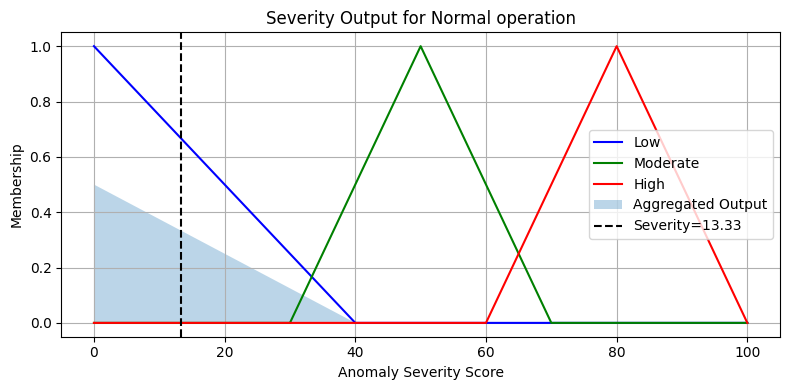


Testing Severe anomaly (high voltage deviation, unstable frequency, unbalanced load):
Inputs: Voltage Deviation=15%, Frequency Variation=1.5 Hz, Load Imbalance=20%
Severity Score: 80.00
Recommended Action: Isolate (Score: 75.00)


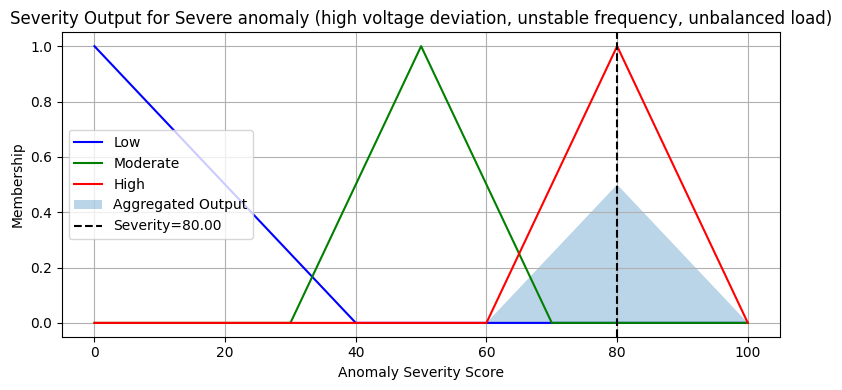


Testing Moderate anomaly (medium voltage deviation, unstable frequency, unbalanced load):
Inputs: Voltage Deviation=7%, Frequency Variation=0.8 Hz, Load Imbalance=15%
Severity Score: 50.00
Recommended Action: Adjust (Frequency Regulation) (Score: 40.00)


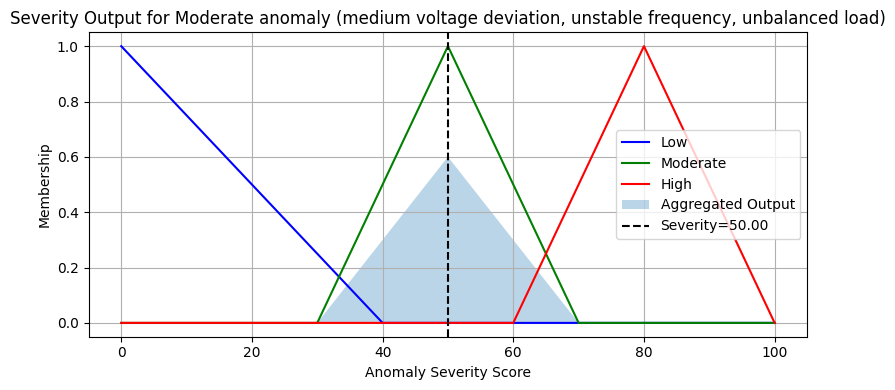


Testing Moderate anomaly (high voltage deviation, stable frequency, balanced load):
Inputs: Voltage Deviation=12%, Frequency Variation=0.3 Hz, Load Imbalance=3%
Severity Score: 50.00
Recommended Action: Adjust (Power Factor Correction) (Score: 40.00)


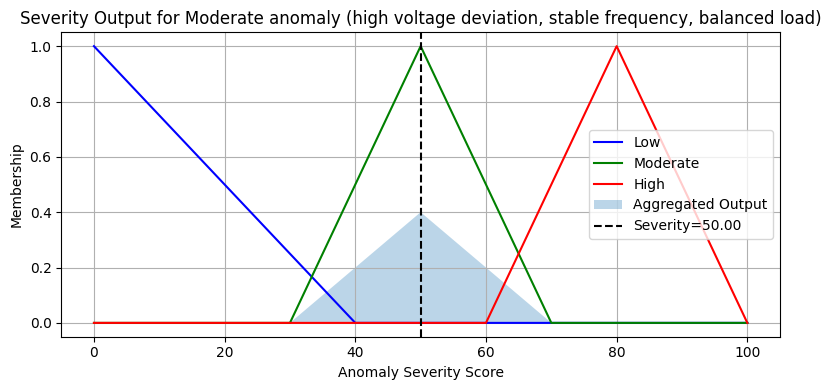


Optimization Tests:

Testing False Positive Check (Normal):
Inputs: Voltage Deviation=0.5%, Frequency Variation=0.05 Hz, Load Imbalance=1.0%
Severity Score: 13.33
Recommended Action: Monitor (Score: 15.00)

Testing False Negative Check (Severe):
Inputs: Voltage Deviation=18.0%, Frequency Variation=1.8 Hz, Load Imbalance=25.0%
Severity Score: 80.00
Recommended Action: Isolate (Score: 75.00)


In [ ]:
# Chunk 3: Test Case Execution
# This section defines and runs the test cases and optimization tests, including per-test-case visualizations.

# Define the test cases for simulated anomalies
test_cases = [
    # Test Case 1: Normal operation with low values
    {"VD": 2, "FV": 0.2, "LI": 5, "Description": "Normal operation"},
    # Test Case 2: Severe anomaly with high values
    {"VD": 15, "FV": 1.5, "LI": 20, "Description": "Severe anomaly (high voltage deviation, unstable frequency, unbalanced load)"},
    # Test Case 3: Moderate anomaly with medium values
    {"VD": 7, "FV": 0.8, "LI": 15, "Description": "Moderate anomaly (medium voltage deviation, unstable frequency, unbalanced load)"},
    # Test Case 4: Moderate anomaly with high VD but stable FV and balanced LI
    {"VD": 12, "FV": 0.3, "LI": 3, "Description": "Moderate anomaly (high voltage deviation, stable frequency, balanced load)"}
]

# Define optimization test cases to check for false positives and negatives
opt_tests = [
    # Optimization Test 1: Normal condition to check for false positives
    {"VD": 0.5, "FV": 0.05, "LI": 1.0, "Description": "False Positive Check (Normal)"},
    # Optimization Test 2: Severe condition to check for false negatives
    {"VD": 18.0, "FV": 1.8, "LI": 25.0, "Description": "False Negative Check (Severe)"}
]

# Initialize a list to store results of the test cases
results = []
# Loop through each test case
for test in test_cases:
    # Print the description of the test case
    print(f"\nTesting {test['Description']}:")
    # Print the input values for this test case
    print(f"Inputs: Voltage Deviation={test['VD']}%, Frequency Variation={test['FV']} Hz, Load Imbalance={test['LI']}%")

    # Evaluate the fuzzy rules for this test case (fuzzification and rule evaluation)
    aggregated, low, mod, high = evaluate_rules(test["VD"], test["FV"], test["LI"])
    # Defuzzify the aggregated output and determine the action
    severity_score, action, action_score = defuzzify_and_act(aggregated, test["VD"], test["FV"], test["LI"])

    # Print the computed severity score
    print(f"Severity Score: {severity_score:.2f}")
    # Print the recommended action and its score
    print(f"Recommended Action: {action} (Score: {action_score:.2f})")

    # Create a figure for plotting the severity output for this test case
    plt.figure(figsize=(8, 4))
    # Plot the Low severity membership function in blue
    plt.plot(severity_range, severity_low, 'b', label='Low')
    # Plot the Moderate severity membership function in green
    plt.plot(severity_range, severity_moderate, 'g', label='Moderate')
    # Plot the High severity membership function in red
    plt.plot(severity_range, severity_high, 'r', label='High')
    # Fill the area under the aggregated output for visualization
    plt.fill_between(severity_range, 0, aggregated, alpha=0.3, label='Aggregated Output')
    # Draw a vertical line at the defuzzified severity score
    plt.axvline(severity_score, color='k', linestyle='--', label=f'Severity={severity_score:.2f}')
    # Set the title of the plot
    plt.title(f"Severity Output for {test['Description']}")
    # Label the x-axis
    plt.xlabel('Anomaly Severity Score')
    # Label the y-axis
    plt.ylabel('Membership')
    # Add a legend to identify each element
    plt.legend()
    # Add a grid for better readability
    plt.grid(True)
    # Adjust the layout to prevent overlap
    plt.tight_layout()
    # Display the plot
    plt.show()

    # Store the results of this test case in a dictionary
    results.append({
        "Description": test["Description"],
        "Voltage Deviation (%)": test["VD"],
        "Frequency Variation (Hz)": test["FV"],
        "Load Imbalance (%)": test["LI"],
        "Anomaly Severity": severity_score,
        "Mitigation Action Score": action_score,
        "Mitigation Action": action
    })

# Run optimization tests
# Print a header for optimization tests
print("\nOptimization Tests:")
# Initialize a list to store optimization test results
opt_results = []
# Loop through each optimization test case
for test in opt_tests:
    # Print the description of the test case
    print(f"\nTesting {test['Description']}:")
    # Print the input values for this test case
    print(f"Inputs: Voltage Deviation={test['VD']}%, Frequency Variation={test['FV']} Hz, Load Imbalance={test['LI']}%")

    # Evaluate the fuzzy rules for this test case
    aggregated, low, mod, high = evaluate_rules(test["VD"], test["FV"], test["LI"])
    # Defuzzify and determine the action
    severity_score, action, action_score = defuzzify_and_act(aggregated, test["VD"], test["FV"], test["LI"])

    # Print the computed severity score
    print(f"Severity Score: {severity_score:.2f}")
    # Print the recommended action and its score
    print(f"Recommended Action: {action} (Score: {action_score:.2f})")

    # Store the results of this optimization test
    opt_results.append({
        "Description": test["Description"],
        "Voltage Deviation (%)": test["VD"],
        "Frequency Variation (Hz)": test["FV"],
        "Load Imbalance (%)": test["LI"],
        "Anomaly Severity": severity_score,
        "Mitigation Action": action
    })

<ipython-input-7-8b6f9a31ec1c>:28: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


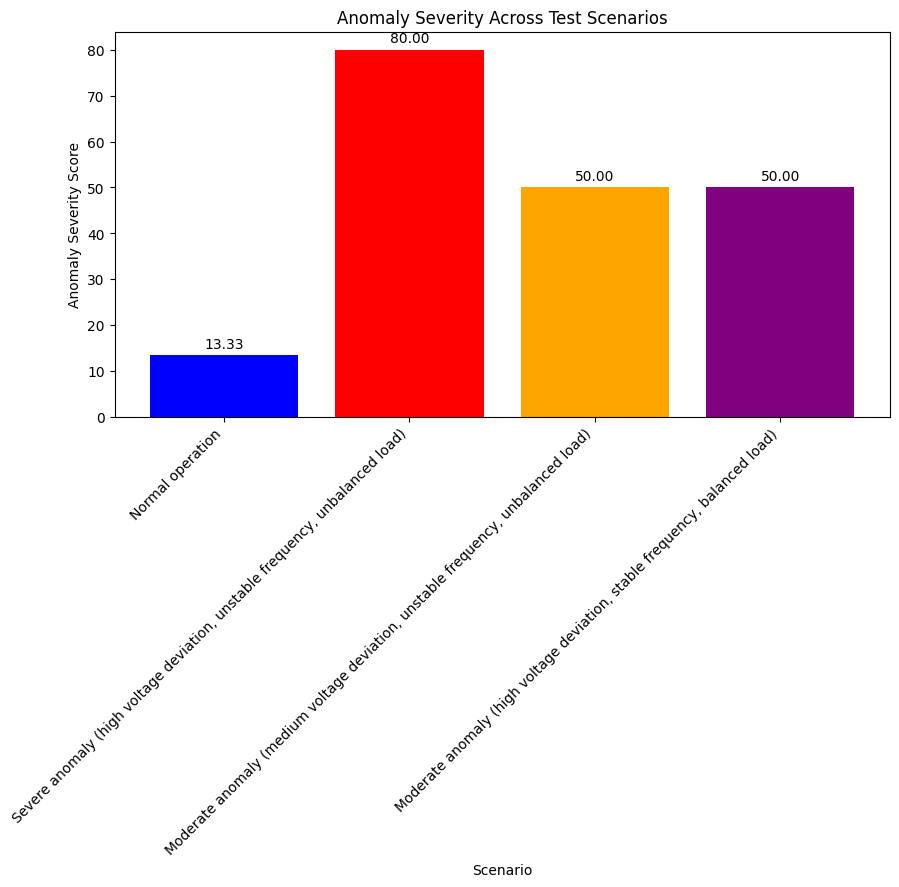

<ipython-input-7-8b6f9a31ec1c>:56: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


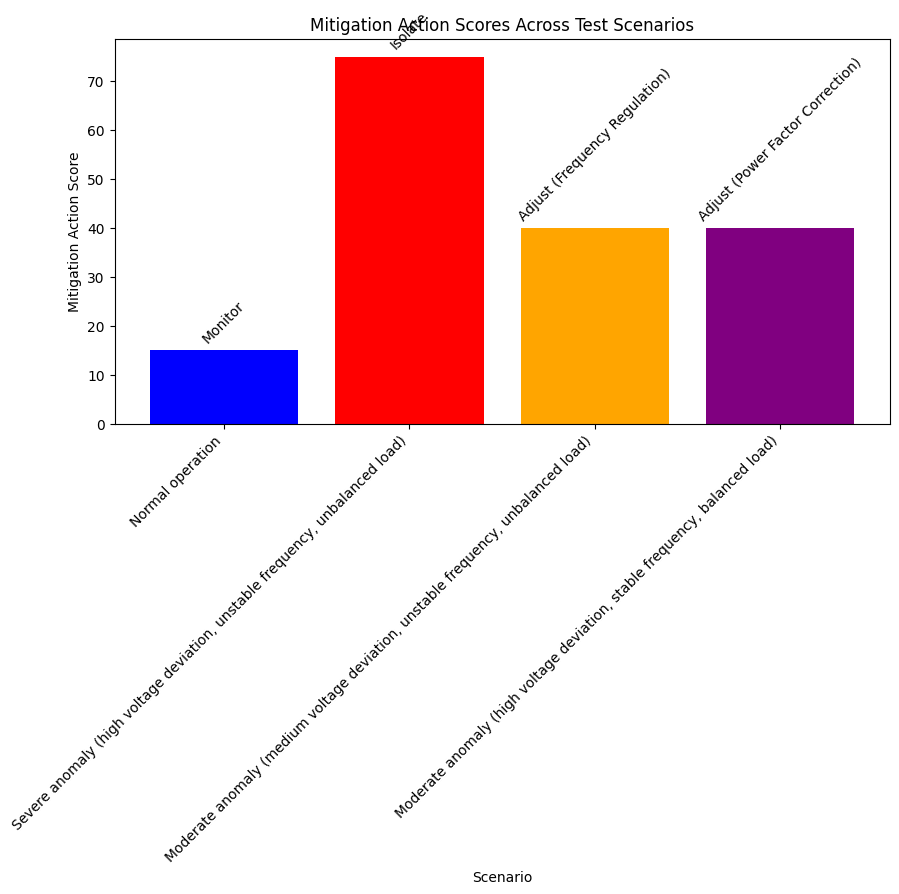

In [ ]:
# Chunk 4: Result Visualization
# This section generates summary visualizations for all test cases (bar plots and scatter plot).

# Create a bar plot for Anomaly Severity across all test scenarios
# Create a figure with size 10x5 inches
plt.figure(figsize=(10, 5))
# Extract the descriptions of all test scenarios
scenarios = [result["Description"] for result in results]
# Extract the severity scores for each scenario
severities = [result["Anomaly Severity"] for result in results]
# Create a bar plot with different colors for each scenario
bars = plt.bar(scenarios, severities, color=['blue', 'red', 'orange', 'purple'])
# Set the title of the plot
plt.title('Anomaly Severity Across Test Scenarios')
# Label the x-axis
plt.xlabel('Scenario')
# Label the y-axis
plt.ylabel('Anomaly Severity Score')
# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
# Add value labels on top of each bar
for bar in bars:
    # Get the height of the bar (severity score)
    yval = bar.get_height()
    # Add the value label above the bar
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.2f}', ha='center', va='bottom')
# Adjust the layout to prevent overlap
plt.tight_layout()
# Display the plot
plt.show()

# Create a bar plot for Mitigation Action Scores across all test scenarios
# Create a figure with size 10x5 inches
plt.figure(figsize=(10, 5))
# Extract the mitigation actions for each scenario
actions = [result["Mitigation Action"] for result in results]
# Extract the mitigation action scores for each scenario
action_scores = [result["Mitigation Action Score"] for result in results]
# Create a bar plot with different colors for each scenario
bars = plt.bar(scenarios, action_scores, color=['blue', 'red', 'orange', 'purple'])
# Set the title of the plot
plt.title('Mitigation Action Scores Across Test Scenarios')
# Label the x-axis
plt.xlabel('Scenario')
# Label the y-axis
plt.ylabel('Mitigation Action Score')
# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
# Add action labels on top of each bar
for i, bar in enumerate(bars):
    # Get the height of the bar (action score)
    yval = bar.get_height()
    # Add the action label above the bar, rotated for readability
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, actions[i], ha='center', va='bottom', rotation=45)
# Adjust the layout to prevent overlap
plt.tight_layout()
# Display the plot
plt.show()

